In [2]:
import pickle

with open("../../results/simulation_result.pkl", "rb") as f:
    result = pickle.load(f)

In [ ]:
import pandas as pd

def extract_biomass_matrix(result):
    """
    从 result 提取 biomass（行：模型，列：环境）
    """
    rows = []
    for env_idx, model_results in result.items():
        for model_id, (biomass, _) in model_results.items():
            rows.append({
                "model_id": model_id,
                "env_idx": env_idx,
                "biomass": biomass
            })
    
    df = pd.DataFrame(rows)
    biomass_matrix = df.pivot(index="model_id", columns="env_idx", values="biomass")
    return biomass_matrix.fillna(0)

biomass_df = extract_biomass_matrix(result)
biomass_df

env_idx,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
model_id,,,,,,,,,,,,,,,,,,,,,
MAG001_gapfilled_noO2,4.637470,53.788062,180.093446,182.854012,136.579079,181.424849,186.817215,136.748957,51.736027,182.717531,...,6.144277,31.965451,192.624634,90.013666,4.882032,37.995898,31.792171,180.120985,76.880879,187.861851
MAG002_gapfilled_noO2,11.890949,137.918107,201.721634,205.623068,203.838299,203.956319,204.494159,200.221946,132.656480,205.086820,...,15.754557,81.962696,208.534308,202.661085,12.518030,97.425380,81.518387,200.077062,197.130458,210.396316
MAG003_gapfilled_noO2,4.637470,12.169564,12.151886,12.394265,12.205488,11.979301,11.982206,11.963983,12.001421,11.987149,...,6.144277,12.105585,18.419749,12.033046,4.882032,11.968061,11.958734,11.956198,11.986844,12.047271
MAG004_gapfilled_noO2,4.637470,53.788062,296.495695,447.021900,136.579079,202.350044,440.068604,136.748957,51.736027,129.159584,...,6.144277,31.965451,295.192212,90.013666,4.882032,37.995898,31.792171,127.142663,76.880879,446.059517
MAG005_gapfilled_noO2,164.078598,137.918107,163.821734,165.915036,164.038737,163.963367,165.783861,163.723924,163.657140,164.653957,...,81.889686,81.962696,166.569298,164.451922,12.518030,97.425380,81.518387,163.884591,163.603094,165.536226
MAG006_gapfilled_noO2,11.890949,137.918107,180.193248,180.193248,180.193248,180.193248,180.193248,175.319176,180.193248,180.193248,...,15.754557,81.962696,180.193248,180.193248,6.259015,48.712690,77.993594,180.193248,180.193248,180.193248
MAG007_gapfilled_noO2,11.890949,36.945856,30.555646,360.389068,85.149861,195.693188,72.739262,45.486818,21.039254,137.028308,...,15.754557,81.962696,756.903107,58.850480,12.518030,24.289606,49.800775,43.037901,32.147486,93.115437
MAG008_gapfilled_noO2,11.890949,132.390127,127.993141,133.406347,129.068286,128.311739,130.105688,106.167866,9.003117,130.578371,...,15.754557,81.962696,146.555399,83.459091,12.518030,13.204268,52.494477,127.238749,25.078139,110.635772
MAG009_gapfilled_noO2,139.417203,137.918107,138.993969,142.541116,139.218141,139.279494,140.435430,138.820422,139.254817,139.717985,...,81.889686,81.962696,145.025298,139.680286,12.518030,97.425380,81.518387,138.998844,138.945030,141.494000


In [4]:
import pandas as pd
import numpy as np

def extract_flux_matrix_with_biomass(result):
    rows = []

    for env_idx, model_results in result.items():
        for model_id, (biomass, fluxes) in model_results.items():
            row = {
                "env_idx": env_idx,
                "model_id": model_id,
                "biomass": biomass
            }
            # 添加 flux 向量（编号为 flux_0, flux_1, ...）
            for i, flux in enumerate(fluxes):
                row[f"flux_{i}"] = float(flux)  
            rows.append(row)

    return pd.DataFrame(rows)

df_model = extract_flux_matrix_with_biomass(result)
print(df_model.shape)
df_model.head()


(2000, 199)


,env_idx,model_id,biomass,flux_0,flux_1,flux_2,flux_3,flux_4,flux_5,flux_6,...,flux_186,flux_187,flux_188,flux_189,flux_190,flux_191,flux_192,flux_193,flux_194,flux_195
0,1,MAG001_gapfilled_noO2,4.637470,-0.066698,-0.033349,-0.033349,0.365213,-0.033349,-0.033349,-0.033349,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,MAG002_gapfilled_noO2,11.890949,-0.066698,-0.033349,-0.033349,0.000000,-0.033349,-0.033349,-0.033349,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,MAG003_gapfilled_noO2,4.637470,-0.066698,-0.033349,-0.033349,0.000000,-0.033349,-0.033349,-0.033349,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,MAG004_gapfilled_noO2,4.637470,-0.066698,-0.033349,-0.033349,0.000000,-0.033349,-0.033349,-0.033349,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,MAG005_gapfilled_noO2,164.078598,-3.000514,-0.460171,-0.460171,0.000000,-0.460171,-0.460171,-0.460171,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


训练集 R²: 0.973
测试集 R²: 0.974
非零系数数: 98


/var/folders/6w/knrbtrj125ggkrx091kd2g840000gn/T/ipykernel_59703/3595422038.py:41: UserWarning: Glyph 22238 (\N{CJK UNIFIED IDEOGRAPH-56DE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/6w/knrbtrj125ggkrx091kd2g840000gn/T/ipykernel_59703/3595422038.py:41: UserWarning: Glyph 24402 (\N{CJK UNIFIED IDEOGRAPH-5F52}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/6w/knrbtrj125ggkrx091kd2g840000gn/T/ipykernel_59703/3595422038.py:41: UserWarning: Glyph 31995 (\N{CJK UNIFIED IDEOGRAPH-7CFB}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/6w/knrbtrj125ggkrx091kd2g840000gn/T/ipykernel_59703/3595422038.py:41: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/6w/knrbtrj125ggkrx091kd2g840000gn/T/ipykernel_59703/3595422038.py:41: UserWarning: Glyph 23545 (\N{CJK UNIFIED IDEOGRAPH-5BF9}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/6w/knrb

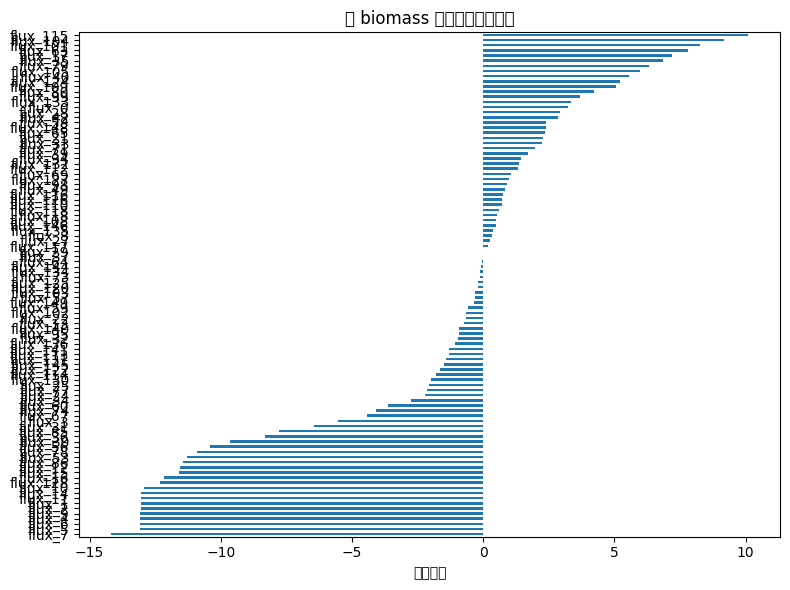

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNetCV
import matplotlib.pyplot as plt
import pandas as pd

# 准备数据
X = df_model[[c for c in df_model.columns if c.startswith("flux_")]].values
y = df_model["biomass"].values

# 80:20 划分
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 标准化
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 弹性网络建模（自动调参）
enet = ElasticNetCV(cv=5, l1_ratio=[0.1, 0.5, 0.9], random_state=42)
enet.fit(X_train_scaled, y_train)

# 输出性能
train_r2 = enet.score(X_train_scaled, y_train)
test_r2 = enet.score(X_test_scaled, y_test)
print(f"训练集 R²: {train_r2:.3f}")
print(f"测试集 R²: {test_r2:.3f}")
print("非零系数数:", (enet.coef_ != 0).sum())

# 可视化重要通量
flux_names = [f"flux_{i}" for i in range(X.shape[1])]
coef_series = pd.Series(enet.coef_, index=flux_names)
coef_series = coef_series[coef_series != 0].sort_values()

plt.figure(figsize=(8, 6))
coef_series.plot(kind="barh")
plt.title("对 biomass 预测最重要的通量")
plt.xlabel("回归系数")
plt.tight_layout()
plt.show()


In [ ]:
#神经网络
import jax
import jax.numpy as jnp
from flax import linen as nn
from typing import Sequence, Callable, Optional

class Biomass_MLP(nn.Module):
    features: Sequence[int]  # [128, 64, 32]
    dropout_rate: float = 0.1  
    use_dropout: bool = False  
    act: Callable = nn.relu  
    training: bool = True  
    @nn.compact
    def __call__(self, x):
        for feat in self.features:
            x = nn.Dense(feat)(x)
            x = self.act(x)
            if self.use_dropout:
                x = nn.Dropout(rate=self.dropout_rate, deterministic=not self.training)(x)
        x = nn.Dense(1)(x)  
        return x


